## Data Observation

It is observed that the dataset is related to hourly bike rental data spanning two years.
The training set is comprised of first 19 days of each month.

## Loading the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Data

In [2]:
bike_df = pd.read_csv("train.csv")

In [3]:
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
bike_df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [5]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
bike_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [7]:
bike_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
bike_df.describe(include="O")

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


### Conclusion:
It can be observed that all the columns are numerical except the **'datetime'** column.
It is noticed that there are no null values in the data from info() function and we will confirm the same during data wrangling process.

# Exploratory Data Analysis

### Exploring *"season"* column

In [9]:
bike_df["season"].nunique()

4

In [10]:
bike_df["season"].unique()

array([1, 2, 3, 4], dtype=int64)

In [11]:
bike_df["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [12]:
bike_df["season"].value_counts(normalize=True)*100

4    25.114826
2    25.105640
3    25.105640
1    24.673893
Name: season, dtype: float64

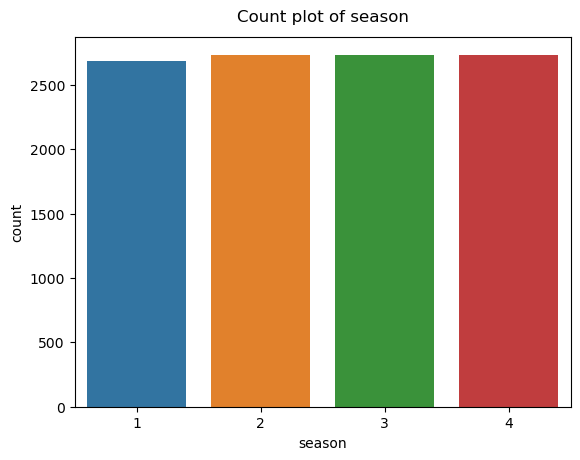

In [13]:
sns.countplot(x=bike_df["season"])

plt.title("Count plot of season",y=1.02)
plt.xlabel("season")
plt.show()

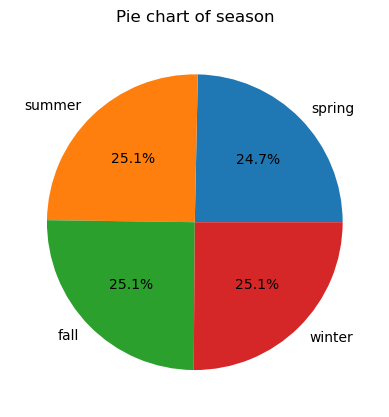

In [14]:
count = [2686,2733,2733,2734]
plt.pie(count,labels=["spring","summer","fall","winter"],autopct="%1.1f%%")

plt.title("Pie chart of season",y=1.02)
plt.show()

#### Conclusion:

* **season** column consists of four unique values i.e., 1, 2, 3 & 4 which can be mapped to spring,summer,fall and winter.
* This column has to be interpreted as *pseudo-numerical* column.
* All seasons are almost having the same frequency except spring is having little less frequency compared to other seasons.

### Exploring *"holiday"* & *"workingday"* columns

In [15]:
bike_df["holiday"].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [16]:
bike_df["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [17]:
weekend = 10886-311-7412
weekend

3163

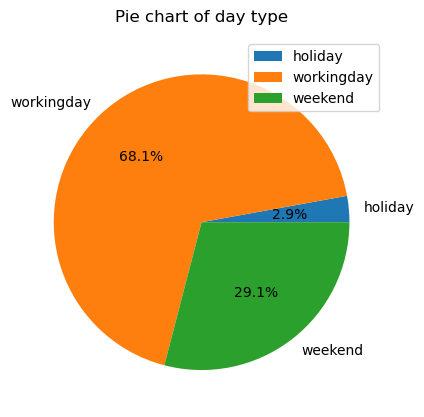

In [18]:
count = [311,7412,(10886-311-7412)]
plt.pie(count,labels=["holiday","workingday","weekend"],autopct="%1.1f%%")

plt.title("Pie chart of day type",y=1.02)
plt.legend()
plt.show()

#### Conclusion:

* **holiday** and **workingday** columns have been explored in conjunction.
* The hours of the weekend have been obtained using these two columns ("holiday" and "workingday") and using this pattern we can also add a new column named as **weekend**.
* It can be observed from the piechart that the working days have the highest frequency with 7412 hours which make 68.1% of the total hours.
* It is followed by weekends with 3163 hours which constitute of 29.1%.
* Holidays have the least frequency with 311 hours which make 2.9%.

### Exploring *"weather"* column

In [19]:
bike_df["weather"].nunique()

4

In [20]:
bike_df["weather"].unique()

array([1, 2, 3, 4], dtype=int64)

In [21]:
bike_df["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [22]:
bike_df["weather"].value_counts(normalize=True)*100

1    66.066507
2    26.033437
3     7.890869
4     0.009186
Name: weather, dtype: float64

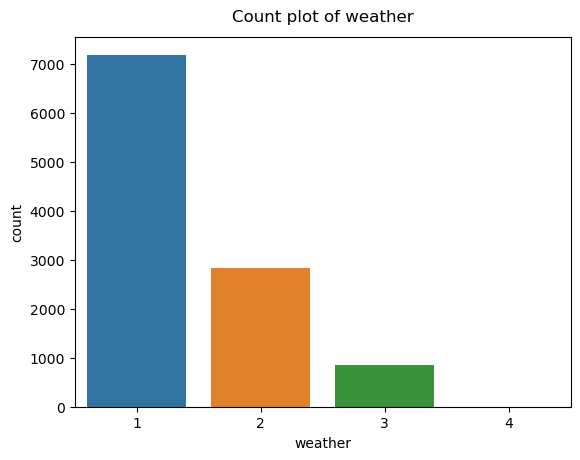

In [23]:
sns.countplot(x=bike_df["weather"])

plt.title("Count plot of weather",y=1.02)
plt.xlabel("weather")
plt.show()

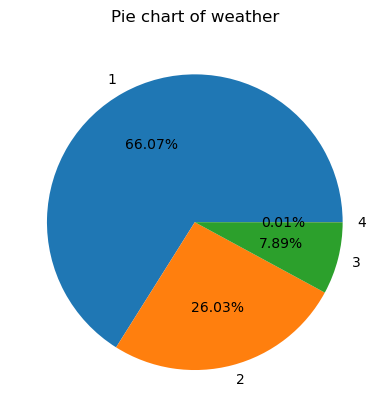

In [24]:
count = [7192,2834,859,1]
plt.pie(count,labels=["1","2","3","4"],autopct="%1.2f%%")

plt.title("Pie chart of weather",y=1.02)
plt.show()

#### Conclusion:

* **weather** column consists of four unique values i.e., 1, 2, 3 & 4 which can be mapped to different scenerios as mentioned in the dataset description i.e.,

1: Clear, Few clouds, Partly cloudy, Partly cloudy;
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist;
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds;
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

* This column has to be interpreted as *pseudo-numerical* column.
* It has been observed that most of the time the weather is clear or partly cloudy.
* The weather has been very harsh only for once.

### Exploring *"temp"* column

In [25]:
bike_df["temp"].mean()

20.23085981995223

In [26]:
bike_df["temp"].min()

0.82

In [27]:
bike_df["temp"].max()

41.0

In [28]:
bike_df["temp"].median()

20.5

In [29]:
bike_df["temp"].std()

7.791589843987506

In [30]:
bike_df["temp"].var()

60.70887229692925

In [31]:
bike_df["temp"].skew()

0.003690844422472008

#### Looking at the Distribution of column

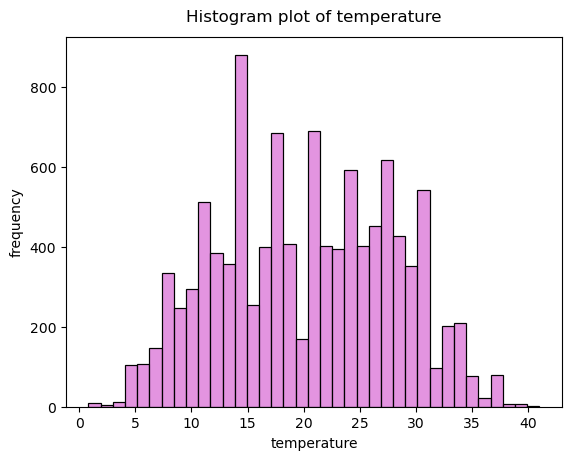

In [32]:
sns.histplot(bike_df["temp"],color="orchid")

plt.title("Histogram plot of temperature",y=1.02)
plt.xlabel("temperature")
plt.ylabel("frequency")
plt.show()

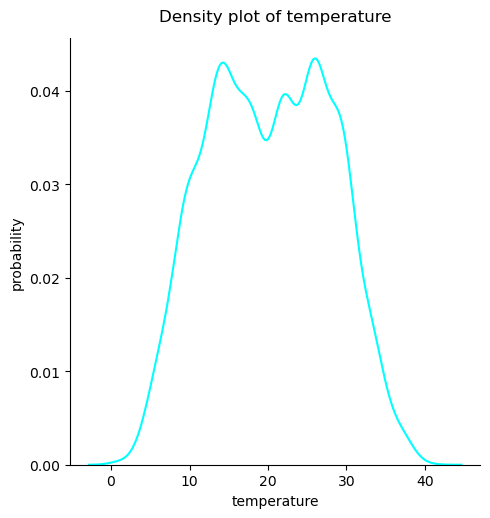

In [33]:
sns.displot(bike_df["temp"],kind="kde",color="cyan")

plt.title("Density plot of temperature",y=1.02)
plt.xlabel("temperature")
plt.ylabel("probability")
plt.show()

#### Looking for Outliers in the column

In [34]:
bike_df["temp"].quantile(0.10),bike_df["temp"].quantile(0.25),bike_df["temp"].quantile(0.50),bike_df["temp"].quantile(0.75),bike_df["temp"].quantile(0.90)

(9.84, 13.94, 20.5, 26.24, 30.34)

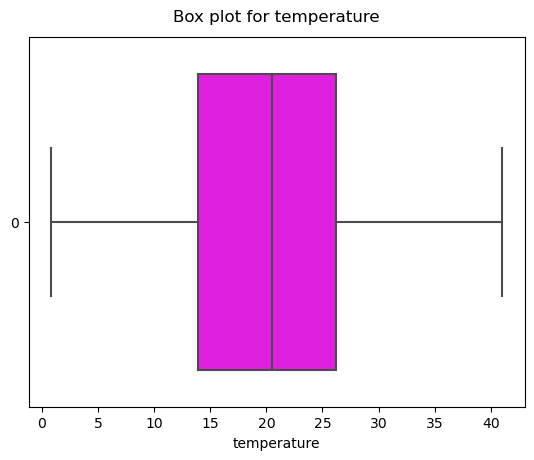

In [35]:
sns.boxplot(bike_df["temp"],orient="h",color="fuchsia")

plt.title("Box plot for temperature",y=1.02)
plt.xlabel("temperature")
plt.show()

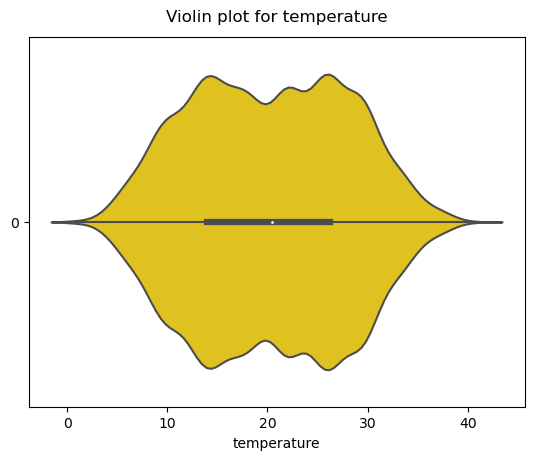

In [36]:
sns.violinplot(bike_df["temp"],orient="h",color="gold")

plt.title("Violin plot for temperature",y=1.02)
plt.xlabel("temperature")
plt.show()

#### Conclusion:

**temp** has a symmetrical distribution i.e., it is not skewed and has a skewness value of 0.003

* The Density curve of column is multimodal and has two peaks.
* The range of values is from 0.82 to 41.
* Most of the temperature is falling under two groups 11-18 and 21-31.
* 10% of temperature is 9.84 celsius and below.
* 25% of temperature is 13.94 celsius and below.
* 50% of temperature is 20.5 celsius and below.
* 75% of temperature is 26.24 celsius and below.
* 90% of temperature is 30.34 celsius and below.
* *temp* column is not having any outliers (i.e., extreme values).

**temp** column might contribute to count of bike rentals

### Exploring *"atemp"* column

In [37]:
bike_df["atemp"].mean()

23.655084052912

In [38]:
bike_df["atemp"].min()

0.76

In [39]:
bike_df["atemp"].max()

45.455

In [40]:
bike_df["atemp"].median()

24.24

In [41]:
bike_df["atemp"].std()

8.474600626484888

In [42]:
bike_df["atemp"].var()

71.81885577841804

In [43]:
bike_df["atemp"].skew()

-0.10255951346908665

#### Looking at the Distribution of column

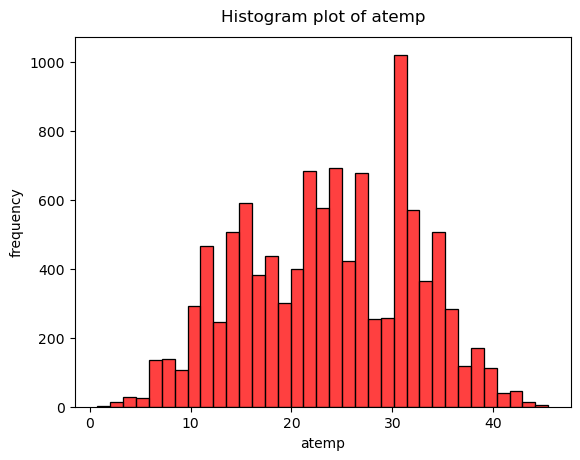

In [44]:
sns.histplot(bike_df["atemp"],color="red")

plt.title("Histogram plot of atemp",y=1.02)
plt.xlabel("atemp")
plt.ylabel("frequency")
plt.show()

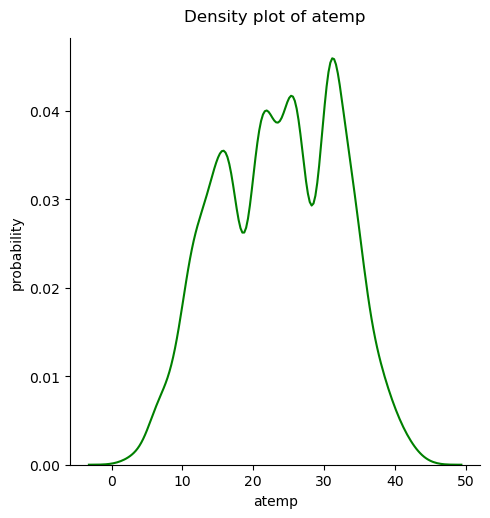

In [45]:
sns.displot(bike_df["atemp"],kind="kde",color="green")

plt.title("Density plot of atemp",y=1.02)
plt.xlabel("atemp")
plt.ylabel("probability")
plt.show()

#### Looking for Outliers in the column

In [46]:
bike_df["atemp"].quantile(0.10),bike_df["atemp"].quantile(0.25),bike_df["atemp"].quantile(0.50),bike_df["atemp"].quantile(0.75),bike_df["atemp"].quantile(0.90)

(12.12, 16.665, 24.24, 31.06, 34.09)

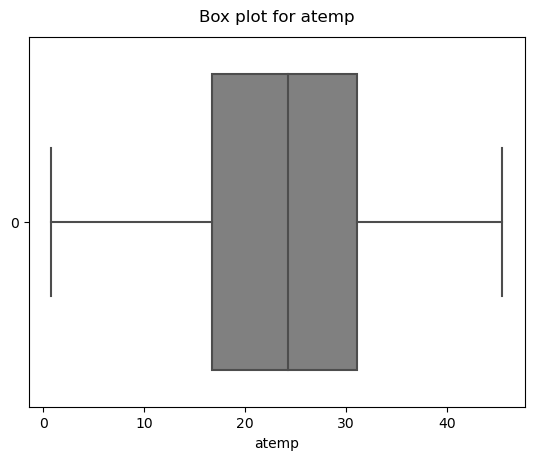

In [47]:
sns.boxplot(bike_df["atemp"],orient="h",color="grey")

plt.title("Box plot for atemp",y=1.02)
plt.xlabel("atemp")
plt.show()

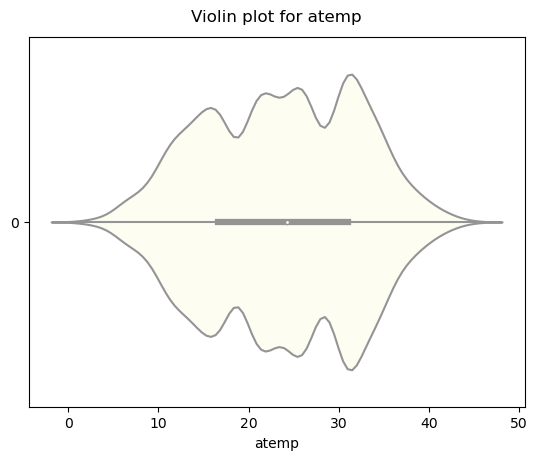

In [48]:
sns.violinplot(bike_df["atemp"],orient="h",color="ivory")

plt.title("Violin plot for atemp",y=1.02)
plt.xlabel("atemp")
plt.show()

#### Conclusion:

**atemp** has a symmetrical distribution i.e., it is not skewed and has a skewness value of -0.103

* The Density curve of column is multimodal.
* The range of values is from 0.76 to 45.455.
* Most of the 'atemp' is falling under the range of 12 to 35 celsius.
* 10% of 'atemp' is 12.12 celsius and below.
* 25% of 'atemp' is 16.665 celsius and below.
* 50% of 'atemp' is 24.24 celsius and below.
* 75% of 'atemp' is 31.06 celsius and below.
* 90% of 'atemp' is 34.09 celsius and below.
* *atemp* column is not having any outliers (i.e., extreme values).

**atemp** column might contribute to count of bike rentals

### Exploring *"humidity"* column

In [49]:
bike_df["humidity"].mean()

61.88645967297446

In [50]:
bike_df["humidity"].min()

0

In [51]:
bike_df["humidity"].max()

100

In [52]:
bike_df["humidity"].median()

62.0

In [53]:
bike_df["humidity"].std()

19.245033277394786

In [54]:
bike_df["humidity"].var()

370.3713058480327

In [55]:
bike_df["humidity"].skew()

-0.08633518364548581

#### Looking at the Distribution of column

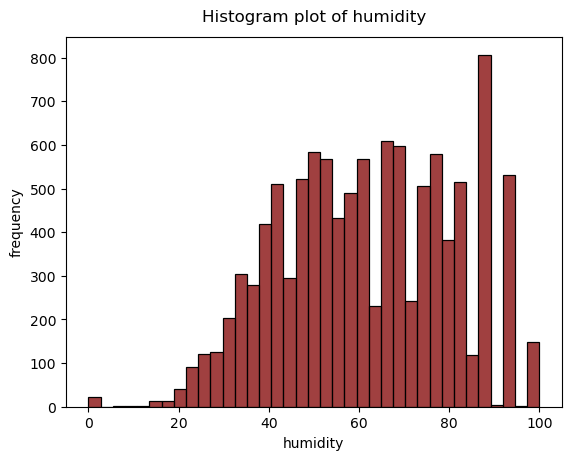

In [56]:
sns.histplot(bike_df["humidity"],color="maroon")

plt.title("Histogram plot of humidity",y=1.02)
plt.xlabel("humidity")
plt.ylabel("frequency")
plt.show()

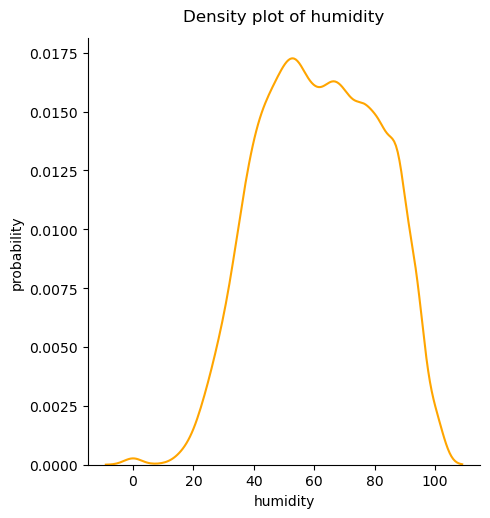

In [57]:
sns.displot(bike_df["humidity"],kind="kde",color="orange")

plt.title("Density plot of humidity",y=1.02)
plt.xlabel("humidity")
plt.ylabel("probability")
plt.show()

#### Looking for Outliers in the column

In [58]:
bike_df["humidity"].quantile(0.10),bike_df["humidity"].quantile(0.25),bike_df["humidity"].quantile(0.50),bike_df["humidity"].quantile(0.75),bike_df["humidity"].quantile(0.90)

(37.0, 47.0, 62.0, 77.0, 88.0)

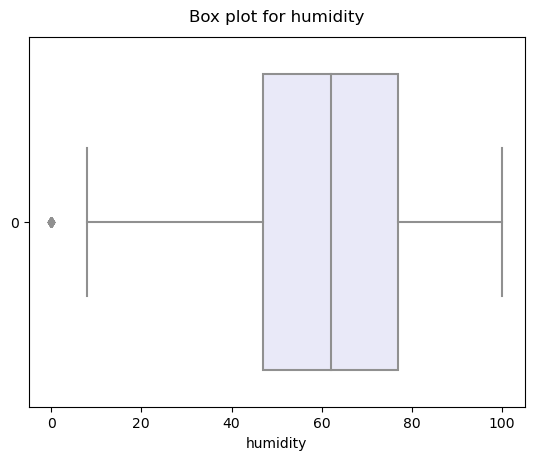

In [59]:
sns.boxplot(bike_df["humidity"],orient="h",color="lavender")

plt.title("Box plot for humidity",y=1.02)
plt.xlabel("humidity")
plt.show()

#### Conclusion:

**humidity** has a symmetrical distribution i.e., it is not skewed and has a skewness value of -0.086

* The Density curve of column is centered along mean 61.886 with standard deviation of 19.245.
* The range of values is from 0 to 100.
* Most of the humidity is in the range of 40 to 90.
* 10% of humidity is 37 and below.
* 25% of humidity is 47 and below.
* 50% of humidity is 62 and below.
* 75% of humidity is 77 and below.
* 90% of humidity is 88 and below.
* *humidity* column is having outliers (i.e., extreme values) towards lower side.

**humidity** column might also contribute to count of bike rentals

### Exploring *"windspeed"* column

In [60]:
bike_df["windspeed"].mean()

12.7993954069447

In [61]:
bike_df["windspeed"].min()

0.0

In [62]:
bike_df["windspeed"].max()

56.9969

In [63]:
bike_df["windspeed"].median()

12.998

In [64]:
bike_df["windspeed"].std()

8.16453732683849

In [65]:
bike_df["windspeed"].var()

66.659669761339

In [66]:
bike_df["windspeed"].skew()

0.5887665265853944

#### Looking at the Distribution of column

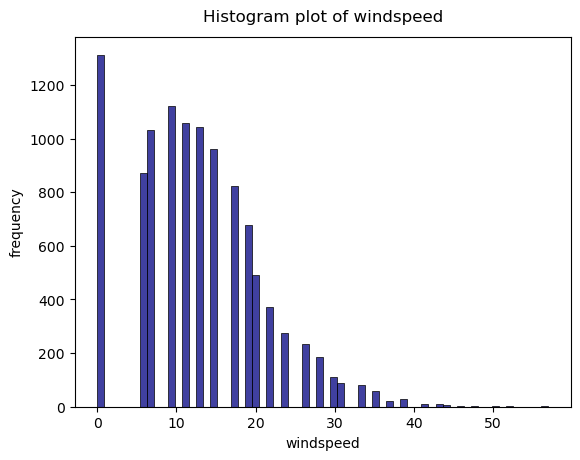

In [67]:
sns.histplot(bike_df["windspeed"],color="navy")

plt.title("Histogram plot of windspeed",y=1.02)
plt.xlabel("windspeed")
plt.ylabel("frequency")
plt.show()

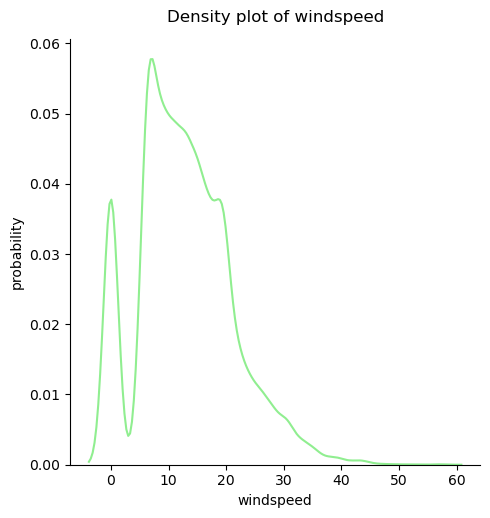

In [68]:
sns.displot(bike_df["windspeed"],kind="kde",color="lightgreen")

plt.title("Density plot of windspeed",y=1.02)
plt.xlabel("windspeed")
plt.ylabel("probability")
plt.show()

#### Looking for Outliers in the column

In [69]:
bike_df["windspeed"].quantile(0.10),bike_df["windspeed"].quantile(0.25),bike_df["windspeed"].quantile(0.50),bike_df["windspeed"].quantile(0.75),bike_df["windspeed"].quantile(0.90)

(0.0, 7.0015, 12.998, 16.9979, 23.9994)

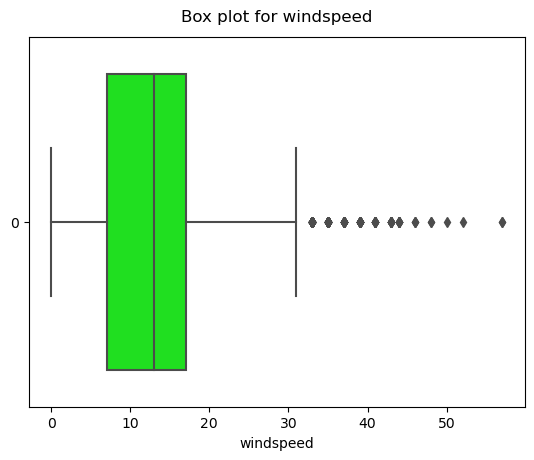

In [70]:
sns.boxplot(bike_df["windspeed"],orient="h",color="lime")

plt.title("Box plot for windspeed",y=1.02)
plt.xlabel("windspeed")
plt.show()

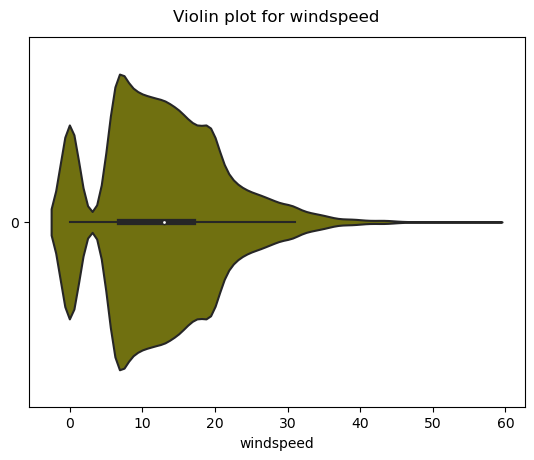

In [71]:
sns.violinplot(bike_df["windspeed"],orient="h",color="olive")

plt.title("Violin plot for windspeed",y=1.02)
plt.xlabel("windspeed")
plt.show()

#### Conclusion:

**windspeed** has an asymmetrical distribution i.e., it is skewed with a skewness value of 0.589

* The Density curve of column is multimodal.
* The range of values is from 0 to 56.9969.
* 10% of windspeed is 0.
* 25% of windspeed is 7.0015 or below.
* 50% of windspeed is 12.998 or below.
* 75% of windspeed is 16.9979 or below.
* 90% of windspeed is 23.9994 or below.
* *windspeed* column is having outliers (i.e., extreme values) towards higher side.

**windspeed** column might contribute to count of bike rentals

### Exploring *"casual"* column

In [72]:
bike_df["casual"].mean()

36.02195480433584

In [73]:
bike_df["casual"].min()

0

In [74]:
bike_df["casual"].max()

367

In [75]:
bike_df["casual"].median()

17.0

In [76]:
bike_df["casual"].std()

49.9604765726498

In [77]:
bike_df["casual"].var()

2496.04921936629

In [78]:
bike_df["casual"].skew()

2.4957483979812567

#### Looking at the Distribution of column

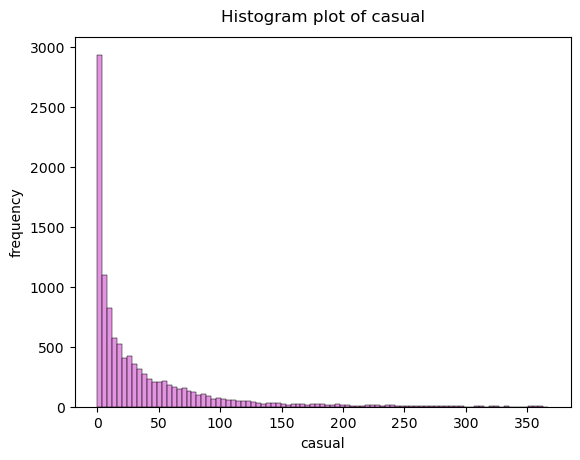

In [79]:
sns.histplot(bike_df["casual"],color="orchid")

plt.title("Histogram plot of casual",y=1.02)
plt.xlabel("casual")
plt.ylabel("frequency")
plt.show()

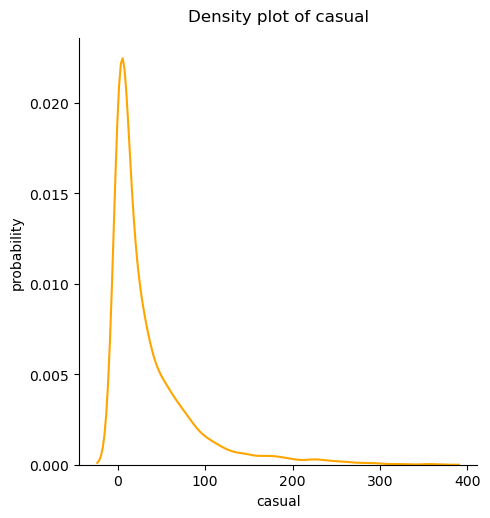

In [80]:
sns.displot(bike_df["casual"],kind="kde",color="orange")

plt.title("Density plot of casual",y=1.02)
plt.xlabel("casual")
plt.ylabel("probability")
plt.show()

#### Looking for Outliers in the column

In [81]:
bike_df["casual"].quantile(0.10),bike_df["casual"].quantile(0.25),bike_df["casual"].quantile(0.50),bike_df["casual"].quantile(0.75),bike_df["casual"].quantile(0.90)

(1.0, 4.0, 17.0, 49.0, 94.0)

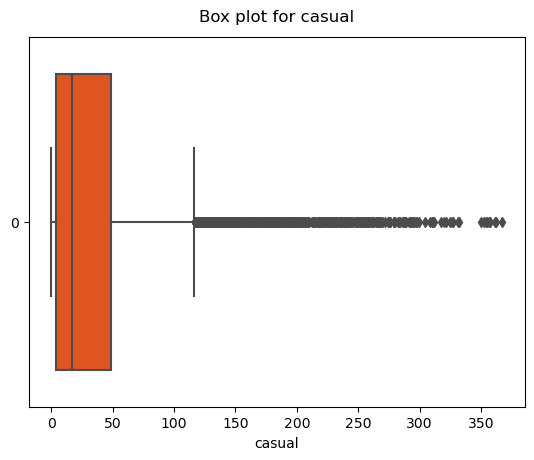

In [82]:
sns.boxplot(bike_df["casual"],orient="h",color="orangered")

plt.title("Box plot for casual",y=1.02)
plt.xlabel("casual")
plt.show()

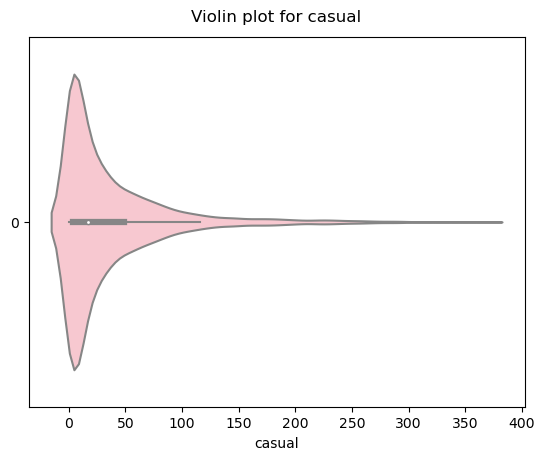

In [83]:
sns.violinplot(bike_df["casual"],orient="h",color="pink")

plt.title("Violin plot for casual",y=1.02)
plt.xlabel("casual")
plt.show()

#### Conclusion:

**casual** has an asymmetrical distribution i.e., it is skewed with a skewness value of 2.495

* The Density curve of column is centered along mean 36.022 with standard deviation of 49.96.
* The range of values is from 0 to 367.
* Most of the non-registered user rentals initiated is in the range from 0 to 50.
* 10% of non-registered user rentals initiated is 1 and below.
* 25% of non-registered user rentals initiated is 4 and below.
* 50% of non-registered user rentals initiated is 17 and below.
* 75% of non-registered user rentals initiated is 49 and below.
* 90% of non-registered user rentals initiated is 94 and below.
* *casual* column is having outliers (i.e., extreme values) towards higher side.

### Exploring *"registered"* column

In [84]:
bike_df["registered"].mean()

155.5521771082124

In [85]:
bike_df["registered"].min()

0

In [86]:
bike_df["registered"].max()

886

In [87]:
bike_df["registered"].median()

118.0

In [88]:
bike_df["registered"].std()

151.0390330819246

In [89]:
bike_df["registered"].var()

22812.789514322718

In [90]:
bike_df["registered"].skew()

1.5248045868182296

#### Looking at the Distribution of column

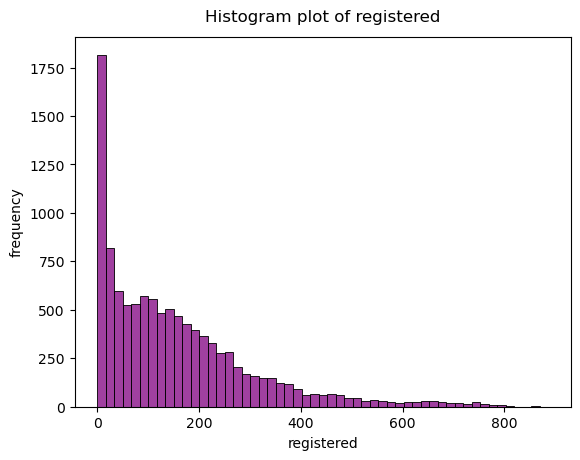

In [91]:
sns.histplot(bike_df["registered"],color="purple")

plt.title("Histogram plot of registered",y=1.02)
plt.xlabel("registered")
plt.ylabel("frequency")
plt.show()

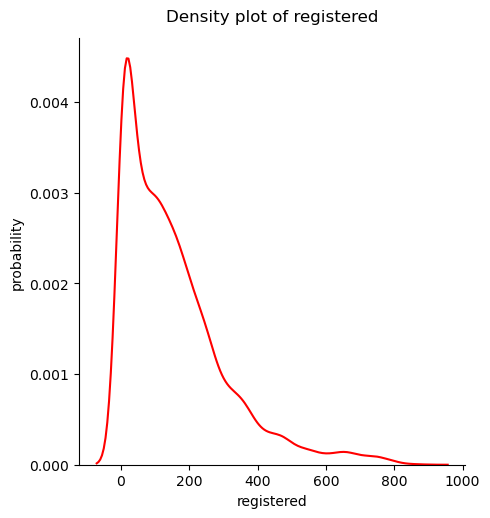

In [92]:
sns.displot(bike_df["registered"],kind="kde",color="red")

plt.title("Density plot of registered",y=1.02)
plt.xlabel("registered")
plt.ylabel("probability")
plt.show()

#### Looking for Outliers in the column

In [93]:
bike_df["registered"].quantile(0.10),bike_df["registered"].quantile(0.25),bike_df["registered"].quantile(0.50),bike_df["registered"].quantile(0.75),bike_df["registered"].quantile(0.90)

(7.0, 36.0, 118.0, 222.0, 354.0)

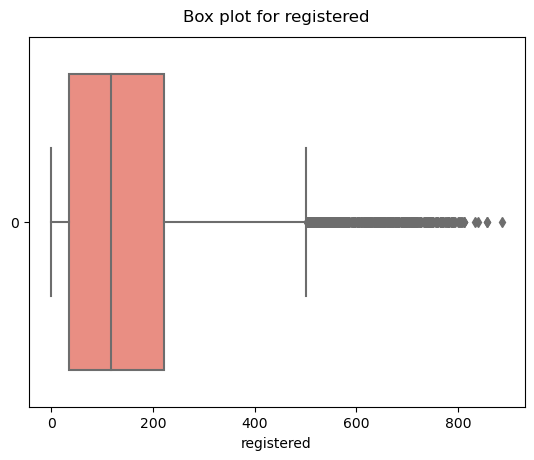

In [94]:
sns.boxplot(bike_df["registered"],orient="h",color="salmon")

plt.title("Box plot for registered",y=1.02)
plt.xlabel("registered")
plt.show()

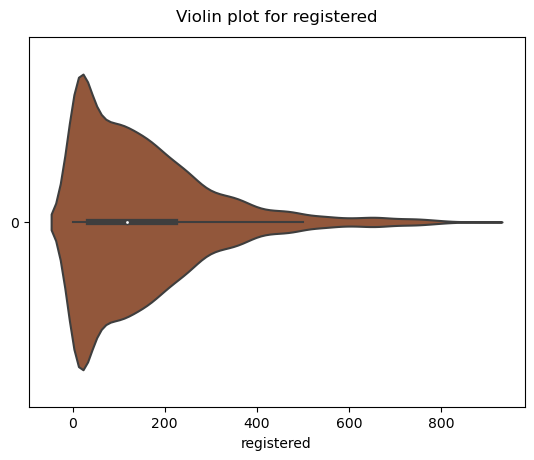

In [95]:
sns.violinplot(bike_df["registered"],orient="h",color="sienna")

plt.title("Violin plot for registered",y=1.02)
plt.xlabel("registered")
plt.show()

#### Conclusion:

**registered** has an asymmetrical distribution i.e., it is skewed with a skewness value of 1.525

* The Density curve of column is centered along mean 155.552 with standard deviation of 151.039.
* The range of values is from 0 to 886.
* Most of the registered user rentals initiated is in the range from 0 to 250.
* 10% of registered user rentals initiated is 7 and below.
* 25% of registered user rentals initiated is 36 and below.
* 50% of registered user rentals initiated is 118 and below.
* 75% of registered user rentals initiated is 222 and below.
* 90% of registered user rentals initiated is 354 and below.
* *registered* column is having outliers (i.e., extreme values) towards higher side.

### Exploring *"count"* column

In [96]:
bike_df["count"].mean()

191.57413191254824

In [97]:
bike_df["count"].min()

1

In [98]:
bike_df["count"].max()

977

In [99]:
bike_df["count"].median()

145.0

In [100]:
bike_df["count"].std()

181.14445383028496

In [101]:
bike_df["count"].var()

32813.313153472234

In [102]:
bike_df["count"].skew()

1.2420662117180776

#### Looking at the Distribution of column

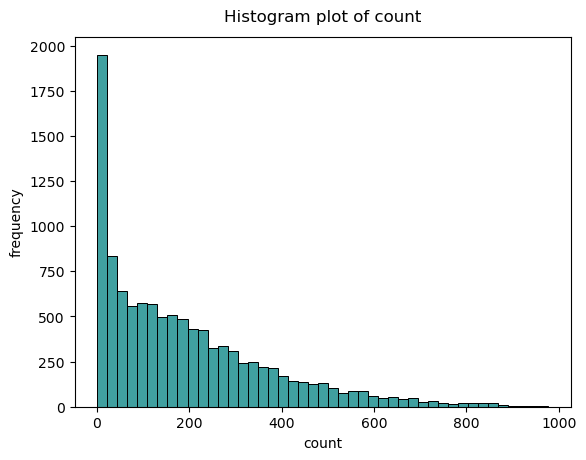

In [103]:
sns.histplot(bike_df["count"],color="teal")

plt.title("Histogram plot of count",y=1.02)
plt.xlabel("count")
plt.ylabel("frequency")
plt.show()

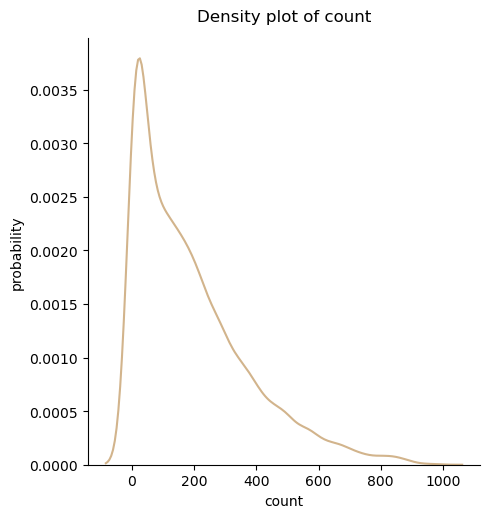

In [104]:
sns.displot(bike_df["count"],kind="kde",color="tan")

plt.title("Density plot of count",y=1.02)
plt.xlabel("count")
plt.ylabel("probability")
plt.show()

#### Looking for Outliers in the column

In [105]:
bike_df["count"].quantile(0.10),bike_df["count"].quantile(0.25),bike_df["count"].quantile(0.50),bike_df["count"].quantile(0.75),bike_df["count"].quantile(0.90)

(9.0, 42.0, 145.0, 284.0, 452.0)

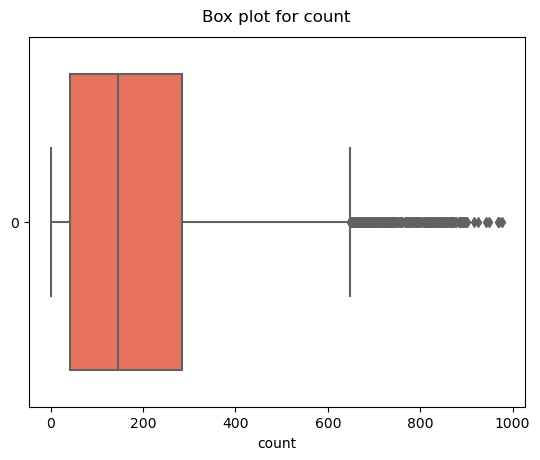

In [106]:
sns.boxplot(bike_df["count"],orient="h",color="tomato")

plt.title("Box plot for count",y=1.02)
plt.xlabel("count")
plt.show()

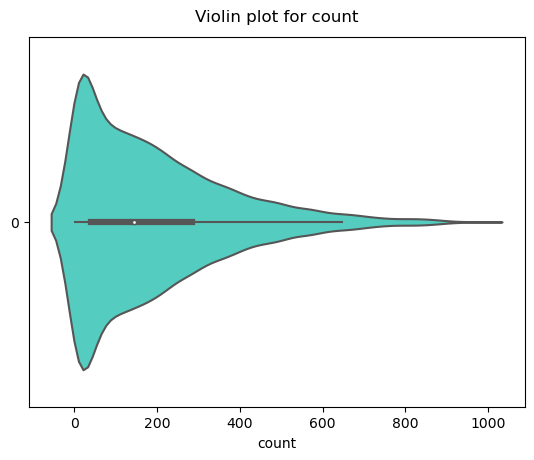

In [107]:
sns.violinplot(bike_df["count"],orient="h",color="turquoise")

plt.title("Violin plot for count",y=1.02)
plt.xlabel("count")
plt.show()

#### Conclusion:

**count** has an asymmetrical distribution i.e., it is skewed with a skewness value of 1.242

* The Density curve of column is centered along mean 191.574 with standard deviation of 181.144.
* The range of values is from 1 to 977.
* Most of the total user rentals initiated is in the range from 0 to 300.
* 10% of total user rentals initiated is 9 and below.
* 25% of total user rentals initiated is 42 and below.
* 50% of total user rentals initiated is 145 and below.
* 75% of total user rentals initiated is 284 and below.
* 90% of total user rentals initiated is 452 and below.
* *count* column is having outliers (i.e., extreme values) towards higher side.

Since count is the sum of casual and registered, there is no need to handle outliers of **count** seperately as that will be done on the casual and registered columns.

### Exploring *"datetime"* column

In [108]:
bike_df["datetime"].nunique()

10886

In [109]:
len(bike_df)

10886

In [110]:
bike_df["datetime"].unique()

array(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
       '2011-01-01 02:00:00', ..., '2012-12-19 21:00:00',
       '2012-12-19 22:00:00', '2012-12-19 23:00:00'], dtype=object)

#### Conclusion:

* It has been observed that there is no repetition in the *datetime* column. It shows that there are no duplicate rows in the data.
* The datatype of the *datetime* column is object. We can convert this *datetime* column into datetime type and can create seperate columns for day, month, year, time etc.,. This datetime handling will be done during data wrangling process.

### Plotting Heat Map

In [111]:
data = bike_df[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','casual','registered','count']].corr()

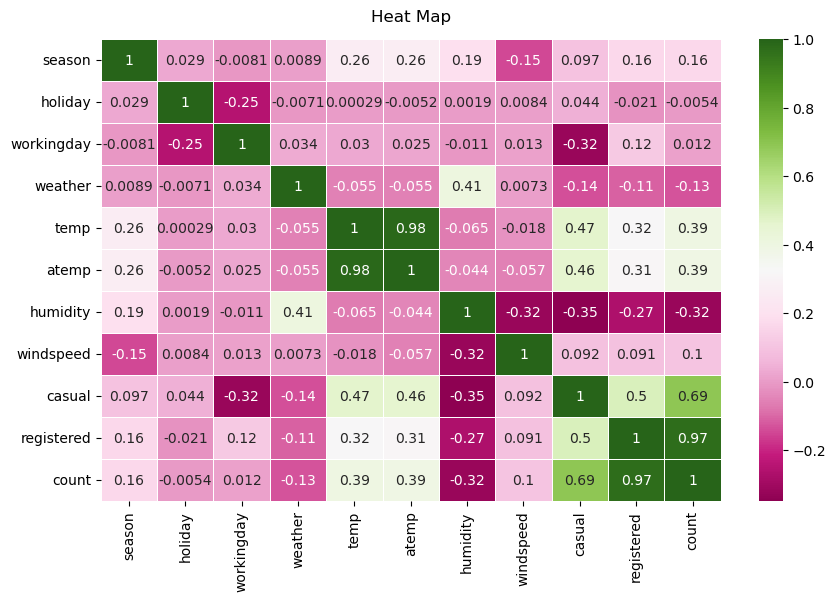

In [112]:
plt.figure(figsize=(10,6))
sns.heatmap(data,cmap="PiYG",annot=True,linewidth=.5)

plt.title("Heat Map",y=1.02)
plt.show()

#### Conclusion:

* The correlation between the columns has been explored.
* It is observed that *"season"*, *"temp"*, *"atemp"* and *"windspeed"* are having good correlation with *"count"* apart from *"casual"* and *"registered"* columns.

# Data Wrangling

### Handling duplicate data

In [113]:
bike_df.shape

(10886, 12)

In [114]:
bike_df.drop_duplicates().shape

(10886, 12)

In [115]:
bike_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


#### Insights:

It has been observed that there are no duplicate values in the data.

### Checking null values

In [116]:
bike_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

#### Insights:

It has been observed that there are no missing values in the data.

### Handling outliers

#### *windspeed* column

In [117]:
bike_df = bike_df[bike_df["windspeed"] <= 35]

In [118]:
bike_df[bike_df["windspeed"] > 35]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


#### *casual* column

In [119]:
bike_df = bike_df[bike_df["casual"] <= 150]

#### *registered* column

In [120]:
bike_df = bike_df[bike_df["registered"] <= 600]

In [121]:
bike_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [122]:
bike_df.reset_index(drop=True,inplace=True)
bike_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10028,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10029,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10030,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10031,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


#### Insights:

* The outliers have been handled in the *windspeed*, *casual* and *registered* columns by applying filtering condition and the index has been updated using **reset_index()** function.
* Since *count* column is the sum of *casual* and *registered* columns, there is no need to handle the *count* column seperately.

### Handling datetime column

In [123]:
bike_df["datetime"] = pd.to_datetime(bike_df["datetime"])

In [124]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10033 entries, 0 to 10032
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10033 non-null  datetime64[ns]
 1   season      10033 non-null  int64         
 2   holiday     10033 non-null  int64         
 3   workingday  10033 non-null  int64         
 4   weather     10033 non-null  int64         
 5   temp        10033 non-null  float64       
 6   atemp       10033 non-null  float64       
 7   humidity    10033 non-null  int64         
 8   windspeed   10033 non-null  float64       
 9   casual      10033 non-null  int64         
 10  registered  10033 non-null  int64         
 11  count       10033 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 940.7 KB


In [125]:
bike_df["year"] = bike_df["datetime"].dt.year
bike_df["month"] = bike_df["datetime"].dt.month
bike_df["day"] = bike_df["datetime"].dt.day
bike_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10028,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19
10029,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19
10030,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19
10031,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19


In [126]:
# Can also use the following for getting name of the month,day of the week and name of the day

# bike_df["month_name"] = bike_df["datetime"].dt.month_name()
# bike_df["day_of_week"] = bike_df["datetime"].dt.dayofweek
# bike_df["day_name"] = bike_df["datetime"].dt.day_name()

#### Insights:

* The *datetime* column has been converted into datetime type from object type.
* We have created new columns i.e., *year*, *month* and *day* which have been extracted from *datetime* column.

### Handling numerical features

In [127]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

bike_df[["temp","atemp","humidity"]] = scaler.fit_transform(bike_df[["temp","atemp","humidity"]])

In [128]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()

bike_df[["windspeed"]] = minmaxscaler.fit_transform(bike_df[["windspeed"]])

In [129]:
bike_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,-1.292275,-1.051726,0.946850,0.000000,3,13,16,2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,-1.398721,-1.142492,0.894203,0.000000,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,-1.398721,-1.142492,0.894203,0.000000,5,27,32,2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,-1.292275,-1.051726,0.630971,0.000000,3,10,13,2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,-1.292275,-1.051726,0.630971,0.000000,0,1,1,2011,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10028,2012-12-19 19:00:00,4,0,1,1,-0.547149,-0.418749,-0.685191,0.788020,7,329,336,2012,12,19
10029,2012-12-19 20:00:00,4,0,1,1,-0.653596,-0.689854,-0.316666,0.454619,10,231,241,2012,12,19
10030,2012-12-19 21:00:00,4,0,1,1,-0.760042,-0.870790,-0.106080,0.454619,4,164,168,2012,12,19
10031,2012-12-19 22:00:00,4,0,1,1,-0.760042,-0.689854,-0.106080,0.181929,12,117,129,2012,12,19


#### Insights:

* The numerical features of the columns *temp*, *atemp*, *humidity* and *windspeed* have been handled.